# Data Cleaning and Exploration Exercise

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('../data2/dob_job_application_filings_subset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

/media/theboymo/d64061fd-29fa-457c-8209-b6a7ed06885f/home/theboymo/MiniConda/envs/ml37/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# drop columns of no interest
df.drop(labels=['Cluster', 'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e', 'PC Filed', 'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid', 'Assigned', 'Approved', 'Fully Permitted', 'Horizontal Enlrgmt', 'Vertical Enlrgmt', 'Owner Type', 'Non-Profit'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 64 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
eFiling Filed                   12846 non-null object
Plumbing                        12846 non-null object
Mechanical                      

In [3]:
df.columns

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board',
       'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler', 'Fuel Burning',
       'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm', 'Equipment',
       'Fire Suppression', 'Curb Cut', 'Other', 'Other Description',
       'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage',
       'ExistingNo. of Stories', 'Proposed No. of Stories', 'Existing Height',
       'Proposed Height', 'Existing Dwelling Units', 'Proposed Dwelling Units',
       'Existing Occupancy', 'Proposed Occupancy', 'Site Fill', 'Zoning Dist1',
       'Zoning Dist2', 'Zoning Dist3', 'Special District 

In [4]:
df[['Site Fill', 'Zoning Dist1',
       'Zoning Dist2', 'Zoning Dist3', 'Special District 1',
       'Special District 2', 'Owner\'s First Name', 'Owner\'s Last Name',
       'Owner\'s Business Name', 'Owner\'s House Number',
       'Owner\'sHouse Street Name', 'City ', 'State', 'Zip', 'Owner\'sPhone #',
       'Job Description', 'DOBRunDate']].head(10).T

,0,1,2,3,4,5,6,7,8,9
Site Fill,NaN,NaN,NOT APPLICABLE,NOT APPLICABLE,NaN,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE
Zoning Dist1,NaN,R2,R7-2,C6-4X,C6-4X,C5-3,R6A,C6-4,C1-9,C5-3
Zoning Dist2,NaN,NaN,NaN,M1-6,M1-6,C6-4.5,NaN,NaN,NaN,NaN
Zoning Dist3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Special District 1,NaN,NaN,NaN,NaN,NaN,MID,NaN,LM,NaN,NaN
Special District 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner's First Name,JAMES,DAVID,JEREMIE,CARMINE,HYUNG RO,PIA,ABDU,LUIGI,PHILIP,EM
Owner's Last Name,MIGLIORE,BLUMENBERG,MARKOWITZ,CASALE,LEE,SILVESTRI,SALEH,FRANCESE,MENDLOW,PORTER
Owner's Business Name,MACKLOWE MANAGEMENT,NA,635 RIVERSIDE DRIVE NY LLC,48 W 25 ST LLC C/O BERNSTEIN,HYUNG-HYANG REALTY CORP,"EMPIRE STATE BUILDING CO., LLC",TOMPKINS DELI,SKYLINE REALTY,BLUE ROCK REAL ESTATE,CARAVENTS INC.
Owner's House Number,126,107,619,150,614,350,437,75,70,337


In [5]:
# drop some further columns
df.drop(labels=['Site Fill', 'Zoning Dist1',
       'Zoning Dist2', 'Zoning Dist3', 'Special District 1',
       'Special District 2', 'Owner\'s First Name', 'Owner\'s Last Name',
       'Owner\'s Business Name', 'Owner\'s House Number',
       'Owner\'sHouse Street Name', 'City ', 'State', 'Zip', 'Owner\'sPhone #',
       'Job Description', 'DOBRunDate'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 47 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
eFiling Filed                   12846 non-null object
Plumbing                        12846 non-null object
Mechanical                      

In [10]:
labels = {
    'Total Est. Fee': 'Total Cost', 
    'Applicant\'s First Name': 'Applicant First Name', 
    'Applicant\'s Last Name': 'Applicant Last Name',
    'Job #': 'Job',
    'Doc #': 'Doc',
    'House #': 'House',
    'Bin #': 'Bin',
    'Community - Board': 'Community Board',
    'Applicant License #': 'Applicant License',
    'ExistingNo. of Stories': 'Existing Stories',
    'Proposed No. of Stories': 'Proposed Stories'
}
# rename a number of columns
df.rename(columns=labels, inplace=True)
df.columns

Index(['Job', 'Doc', 'Borough', 'House', 'Street Name', 'Block', 'Lot', 'Bin',
       'Job Type', 'Job Status', 'Job Status Descrp', 'Latest Action Date',
       'Building Type', 'Community Board', 'eFiling Filed', 'Plumbing',
       'Mechanical', 'Boiler', 'Fuel Burning', 'Fuel Storage', 'Standpipe',
       'Sprinkler', 'Fire Alarm', 'Equipment', 'Fire Suppression', 'Curb Cut',
       'Other', 'Other Description', 'Applicant First Name',
       'Applicant Last Name', 'Applicant Professional Title',
       'Applicant License', 'Initial Cost', 'Total Cost', 'Fee Status',
       'Existing Zoning Sqft', 'Proposed Zoning Sqft',
       'Enlargement SQ Footage', 'Street Frontage', 'Existing Stories',
       'Proposed Stories', 'Existing Height', 'Proposed Height',
       'Existing Dwelling Units', 'Proposed Dwelling Units',
       'Existing Occupancy', 'Proposed Occupancy'],
      dtype='object')

In [11]:
df.sample(10).T

,3995,8953,667,11634,6187,9379,10575,6936,4726,3431
Job,140077690,520140730,320757301,320513707,121054143,121636104,121552239,121613646,420796446,121612745
Doc,1,1,1,3,1,3,1,1,3,1
Borough,MANHATTAN,STATEN ISLAND,BROOKLYN,BROOKLYN,MANHATTAN,MANHATTAN,MANHATTAN,MANHATTAN,QUEENS,MANHATTAN
House,585,42,101,35,462,76,217,670,112-26,371
Street Name,WEST END AVENUE,FAIRWAY LANE,4 STREET,CLERMONT AVENUE,FIRST AVENUE,THOMPSON STREET,WEST 42ND ST,WEST END AVE,ROOSEVELT AVENUE,BROADWAY
Block,1250,258,465,2033,962,488,1014,1240,2013,175
Lot,30,187,46,6,100,12,20,61,26,31
Bin,1034019,5824479,3008007,3398399,1086515,1007326,1024684,1033621,4049904,1001937
Job Type,A3,NB,A3,NB,A2,A2,A2,A2,NB,A2
Job Status,R,H,P,F,D,A,D,D,A,P


In [13]:
# examine the number of missing samples
missing_values_count = df.isnull().sum()
missing_values_count

Job                             0
Doc                             0
Borough                         0
House                           0
Street Name                     0
Block                           0
Lot                             0
Bin                             0
Job Type                        0
Job Status                      0
Job Status Descrp               0
Latest Action Date              0
Building Type                   0
Community Board                 0
eFiling Filed                   0
Plumbing                        0
Mechanical                      0
Boiler                          0
Fuel Burning                    0
Fuel Storage                    0
Standpipe                       0
Sprinkler                       0
Fire Alarm                      0
Equipment                       0
Fire Suppression                0
Curb Cut                        0
Other                           0
Other Description               0
Applicant First Name            0
Applicant Last

In [17]:
df[['Plumbing', 'Mechanical', 'Boiler', 'Existing Dwelling Units', 'Proposed Dwelling Units']].values

array([['X', 'X', ' ', '     ', '     '],
       [' ', ' ', ' ', '     ', '     '],
       ['X', ' ', ' ', '   20', '   20'],
       ...,
       ['X', ' ', ' ', '   40', '   40'],
       ['X', ' ', ' ', '     ', '     '],
       ['X', ' ', ' ', '     ', '     ']], dtype=object)

In [18]:
columns = ['Plumbing', 'Mechanical', 'Boiler', 'Fuel Burning', 'Fuel Storage', 
           'Standpipe', 'Sprinkler', 'Fire Alarm', 'Equipment', 'Fire Suppression', 
           'Curb Cut', 'Other', 'Existing Dwelling Units', 'Proposed Dwelling Units',
       'Existing Occupancy', 'Proposed Occupancy']
# drop columns with large numbers of empty strings as values
df.drop(labels=columns, axis=1, inplace=True)

In [19]:
df.sample(10).T

,3501,2137,5775,6122,6445,585,7637,1167,6221,5071
Job,440080314,121585711,320513609,201029779,121621058,121594765,420839105,320756696,121623163,120845826
Doc,1,1,1,1,2,1,1,1,1,1
Borough,QUEENS,MANHATTAN,BROOKLYN,BRONX,MANHATTAN,MANHATTAN,QUEENS,BROOKLYN,MANHATTAN,MANHATTAN
House,42-44,155,60,1701,177,150,40-34,1710,73,500
Street Name,9 STREET,EAST 50 STREET,POWERS ST.,FULTON AVE,FT WASHINGTON AVENUE,WEST 62ND STREET,61 STREET,AVENUE Y,MOTT STREET,8TH AVENUE
Block,462,1305,2780,2930,2139,1132,1335,7438,200,785
Lot,1,33,7,1,1,20,65,1,22,1
Bin,4005310,1036456,3398363,2009659,1076746,1813456,4031429,3331174,1002395,1014421
Job Type,A2,A3,A3,A3,A2,A2,A2,A2,A2,A2
Job Status,H,D,A,P,P,D,A,P,P,D


#### Identify any properties of interest through their frequency count

In [45]:
df.groupby('Applicant License')['Applicant License'].count()

Applicant License
           41
0001498     1
0002511     1
0002811     1
0002891     1
0003469     1
0005782     1
0005785     1
0006005     1
0006209    11
0006216     1
0006670     1
0006946     1
0007226     4
0007362     3
0007538     1
0007608     2
0007636     1
0007878     7
0008122     1
0008327     1
0008350     1
0008610     1
0008624     1
0008660     1
0008666     3
0008753     2
0008768     1
0008793     1
0008902     2
           ..
0607281     2
0610281     1
0615111     1
0620631     3
0621991     2
0622611     1
0626241     2
0626681     1
0631681     1
0632101     2
0633551     2
0636741     1
0638711     1
0641461     1
0650351     4
0653461     1
0659501     2
0675021     1
0701541    10
0708841     1
0727761     5
0738751     2
0739541     2
0745841     2
0754761     1
0770061     1
0778301     2
0781207     2
0844161     1
0915191     1
Name: Applicant License, Length: 2699, dtype: int64

In [44]:
df.groupby('Building Type')['Building Type'].count()

Building Type
1-2-3 FAMILY     2118
OTHER           10728
Name: Building Type, dtype: int64

In [38]:
df.groupby('Community Board')['Community Board'].count()

Community Board
         37
101     566
102     712
103     319
104     506
105    1558
106     574
107     544
108     833
109     170
110     169
111     164
112     162
118      28
164       4
201      85
202      43
203      80
204      83
205      84
206      76
207      97
208      85
209     101
210      62
211      68
212     106
301     373
302     342
303     193
       ... 
309      60
310     108
311     111
312     146
313     114
314     109
315     153
316      99
317      59
318      78
355       4
401     223
402     212
403      99
404     133
405     153
406      92
407     319
408     105
409      90
410      86
411     160
412     149
413     120
414     165
481       3
482       1
501     148
502     182
503     225
Name: Community Board, Length: 65, dtype: int64

In [41]:
df.groupby('Other Description')['Other Description'].count()

Other Description
                   5834
ANTENNA             137
ARCH                 75
ARCH DETAIL           1
ARCH/STRUCT           1
ARCH/STRUCTURAL       2
ARCHITECTURAL        67
AWNING               78
AWNINGS               6
BOILER CHIMNEY        1
BPP                 215
BRACING               1
CACOON NETTING        1
CEILING LIGHT         2
CHIMNEY               2
CHIMNEY LINER         4
CHIMNEY PIPE          1
CIVIL                13
CIVIL SITE WORK       1
CIVIL/SITEWORK        1
CNG SKID              1
CONC BLOCK            1
CONC BLOCK WALL       2
CONC. PAD             1
CONCRETE PAD          1
CONST WORK            1
CONST/STRUCT          1
CONST/STURCTURE       1
CONSTR                1
CONSTRUCTION          6
                   ... 
TEMP PROD EQUIP       1
TEMP STAGE            1
TEMP TENT             4
TEMP TENT.            1
TEMP TENTS           10
TEMP USE              1
TEMP USE PERMIT       1
TEMP. INSTALL        11
TEMP. INSTALL.        1
TEMP. SHORING         

In [42]:
df.groupby('Applicant Professional Title')['Applicant Professional Title'].count()

Applicant Professional Title
OT      41
PE    7120
RA    5685
Name: Applicant Professional Title, dtype: int64

In [43]:
df.groupby('Fee Status')['Fee Status'].count()

Fee Status
DEFERRED      155
EXEMPT       1480
STANDARD    11211
Name: Fee Status, dtype: int64

In [46]:
df.groupby('Job Status Descrp')['Job Status Descrp'].count()

Job Status Descrp
APPLICATION ASSIGNED TO PLAN EXAMINER        204
APPLICATION PROCESSED - ENTIRE              5191
APPLICATION PROCESSED - NO PLAN EXAM         220
APPLICATION PROCESSED - PAYMENT ONLY           5
APPLICATION PROCESSED-PART-NO PAYMENT         36
COMPLETED                                      8
PERMIT ISSUED - ENTIRE JOB/WORK             1548
PERMIT ISSUED - PARTIAL JOB                  405
PLAN EXAM - APPROVED                        2322
PLAN EXAM - DISAPPROVED                      681
PLAN EXAM - IN PROCESS                      1341
PLAN EXAM - PARTIAL APPROVAL                   1
PRE-FILING                                   884
Name: Job Status Descrp, dtype: int64

In [47]:
df.groupby('Job')['Job'].count()

Job
103643844    2
103643853    1
103643862    1
103643871    1
103643880    1
103643899    1
103643906    3
103643915    1
103643924    2
103643933    1
103643942    1
103643951    1
103643960    4
103643979    3
103643988    1
103644004    1
103644013    2
103644022    1
103644031    3
103644040    1
103644059    1
103644077    1
103644086    1
103644095    1
103644102    1
103644120    1
110366988    2
120548559    2
120553187    2
120627759    1
            ..
520143942    1
520143951    1
520143979    1
520143988    1
520144638    1
520146057    1
520180009    1
520180018    1
520180027    1
520180036    1
540022090    1
540022134    1
540022296    1
540022410    1
540022474    1
540022553    1
540022857    1
540023115    1
540023357    1
540023507    1
540023749    1
540023794    1
540023801    1
540024052    1
540024221    1
540024249    1
540024258    1
540024356    1
540024533    1
540024604    1
Name: Job, Length: 11658, dtype: int64

In [48]:
df.groupby('Doc')['Doc'].count()

Doc
1    11345
2     1066
3      327
4       75
5       25
6        4
7        1
8        2
9        1
Name: Doc, dtype: int64

In [70]:
df.groupby('Borough')['Borough'].count()

Borough
BRONX             974
BROOKLYN         2866
MANHATTAN        6310
QUEENS           2121
STATEN ISLAND     575
Name: Borough, dtype: int64

In [71]:
# alternatively, use 'value_counts()'
df.Borough.value_counts(dropna=False)

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64

In [50]:
df.groupby('Bin')['Bin'].count()

Bin
1000003     9
1000005    10
1000006     8
1000007     7
1000017     3
1000018     3
1000020     5
1000023     6
1000027     1
1000037     1
1000038     1
1000044     2
1000045     1
1000059     6
1000060     4
1000301     1
1000799     2
1000802     1
1000803     2
1000808     1
1000812     2
1000817     1
1000819     1
1000820     1
1000821     1
1000824     1
1000825     2
1000826     1
1000859     3
1000865     4
           ..
5859616     1
5862231     1
5862232     1
5862233     1
5862379     1
5862611     1
5862619     2
5862620     2
5862621     2
5862622     2
5862623     2
5862624     1
5862959     1
5863019     1
5863276     1
5863277     1
5863278     1
5863281     1
5863296     1
5863444     1
5863467     1
5864469     4
5864845     1
5864846     1
5864847     1
5864848     1
5864849     1
5864850     1
5864851     1
5864852     1
Name: Bin, Length: 8335, dtype: int64

In [51]:
df.groupby('Job Type')['Job Type'].count()

Job Type
A1     816
A2    8399
A3    2491
DM     234
NB     693
PA     140
SC      39
SI      34
Name: Job Type, dtype: int64

In [52]:
df.groupby('Job Status')['Job Status'].count()

Job Status
A     884
B      36
C       5
D    5191
E     220
F     204
H    1341
J     681
K       1
P    2322
Q     405
R    1548
U       8
Name: Job Status, dtype: int64

In [64]:
# convert 'Inital Cost' and 'Total Cost' into numerals
df['Initial Cost'] = df['Initial Cost'].replace('[\$,]', '', regex=True)
df['Initial Cost'] = pd.to_numeric(df['Initial Cost'])
df['Total Cost'] = df['Total Cost'].replace('[\$,]', '', regex=True)
df['Total Cost'] = pd.to_numeric(df['Total Cost'])

In [65]:
df.head().T

,0,1,2,3,4
Job,121577873,520129502,121601560,121601203,121601338
Doc,2,1,1,1,1
Borough,MANHATTAN,STATEN ISLAND,MANHATTAN,MANHATTAN,MANHATTAN
House,386,107,63,48,45
Street Name,PARK AVENUE SOUTH,KNOX PLACE,WEST 131 STREET,WEST 25TH STREET,WEST 29 STREET
Block,857,342,1729,826,831
Lot,38,1,9,69,7
Bin,1016890,5161350,1053831,1015610,1015754
Job Type,A2,A3,A2,A2,A3
Job Status,D,A,Q,D,D


In [60]:
df.columns

Index(['Job', 'Doc', 'Borough', 'House', 'Street Name', 'Block', 'Lot', 'Bin',
       'Job Type', 'Job Status', 'Job Status Descrp', 'Latest Action Date',
       'Building Type', 'Community Board', 'eFiling Filed',
       'Other Description', 'Applicant First Name', 'Applicant Last Name',
       'Applicant Professional Title', 'Applicant License', 'Initial Cost',
       'Total Cost', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage',
       'Existing Stories', 'Proposed Stories', 'Existing Height',
       'Proposed Height'],
      dtype='object')

In [66]:
# create a dataframe with a subset of the columns of interest
df_subset = df[['Doc', 'Borough', 'Job Type', 'Job Status', 'Community Board',
       'Initial Cost', 'Total Cost', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage',
       'Existing Stories', 'Proposed Stories', 'Existing Height',
       'Proposed Height']]

In [68]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 15 columns):
Doc                       12846 non-null int64
Borough                   12846 non-null object
Job Type                  12846 non-null object
Job Status                12846 non-null object
Community Board           12846 non-null object
Initial Cost              12846 non-null float64
Total Cost                12846 non-null float64
Existing Zoning Sqft      12846 non-null int64
Proposed Zoning Sqft      12846 non-null int64
Enlargement SQ Footage    12846 non-null int64
Street Frontage           12846 non-null int64
Existing Stories          12846 non-null int64
Proposed Stories          12846 non-null int64
Existing Height           12846 non-null int64
Proposed Height           12846 non-null int64
dtypes: float64(2), int64(9), object(4)
memory usage: 1.5+ MB


In [72]:
# summary statistics
df_subset.describe()

,Doc,Initial Cost,Total Cost,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,Existing Stories,Proposed Stories,Existing Height,Proposed Height
count,12846.000000,1.284600e+04,1.284600e+04,1.284600e+04,1.284600e+04,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000
mean,1.162930,1.803139e+05,2.894909e+03,1.439973e+03,2.007286e+03,46.101432,3.069360,8.062354,8.144325,94.022809,94.917562
std,0.514937,7.961524e+06,1.213534e+05,3.860757e+04,4.081570e+04,784.216569,37.246034,11.874080,11.843492,146.917360,146.580666
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000e+00,2.250000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,20.000000,21.000000
50%,1.000000,1.597500e+04,4.195000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,4.000000,45.000000,45.000000
75%,1.000000,6.790500e+04,9.297000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,9.000000,9.000000,105.000000,107.000000
max,9.000000,9.003000e+08,1.014000e+07,2.873107e+06,2.873107e+06,50384.000000,3160.000000,102.000000,102.000000,4200.000000,4200.000000


### Visualize the Data

In [78]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = 'Housing Data'
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

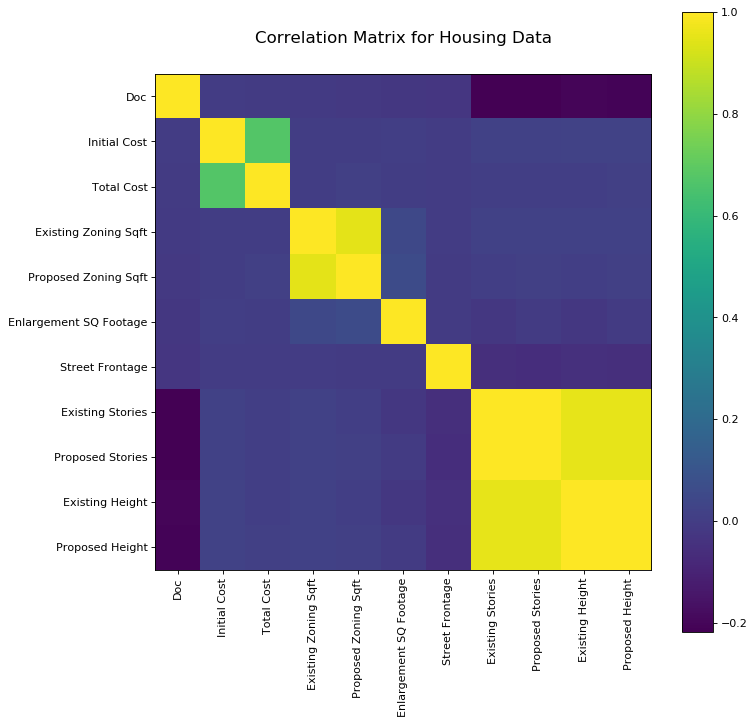

In [79]:
plotCorrelationMatrix(df_subset, 10)